<a href="https://colab.research.google.com/github/GursimranKaur12/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Loading the Dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Datasets

In [2]:
df = pd.read_csv('netflix.csv.txt')

Inspect the Data

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   

Data Cleaning and Preparation

In [5]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

In [6]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [7]:
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)
df['is_movie'] = df['type'] == 'Movie'

In [8]:
print(df.isnull().sum())

show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
date_added            98
release_year           0
rating                 4
duration               3
listed_in              0
description            0
year_added            98
month_added           98
duration_minutes       3
is_movie               0
dtype: int64


Exploratory Data Analysis(EDA)

1. Ratio of Movies vs TV Shows

<ipython-input-12-12e66a773c05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')


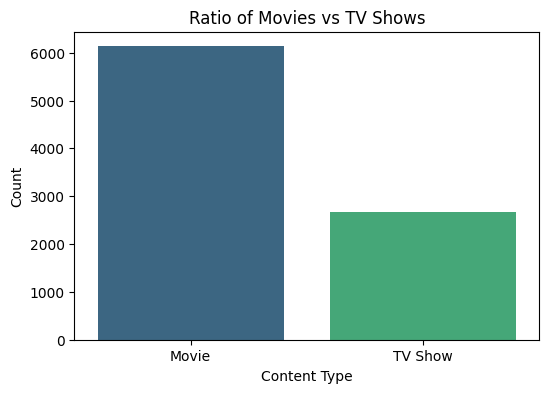

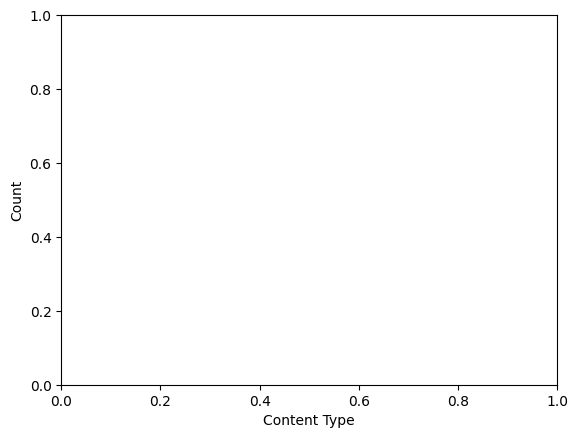

In [12]:
content_type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')
plt.title('Ratio of Movies vs TV Shows')
plt.ylabel('Count')
plt.xlabel('Content Type')
plt.show()
plt.ylabel('Count')
plt.xlabel('Content Type')
plt.show()

2. Most Popular Genres Globally

<ipython-input-13-d758e64e3b0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


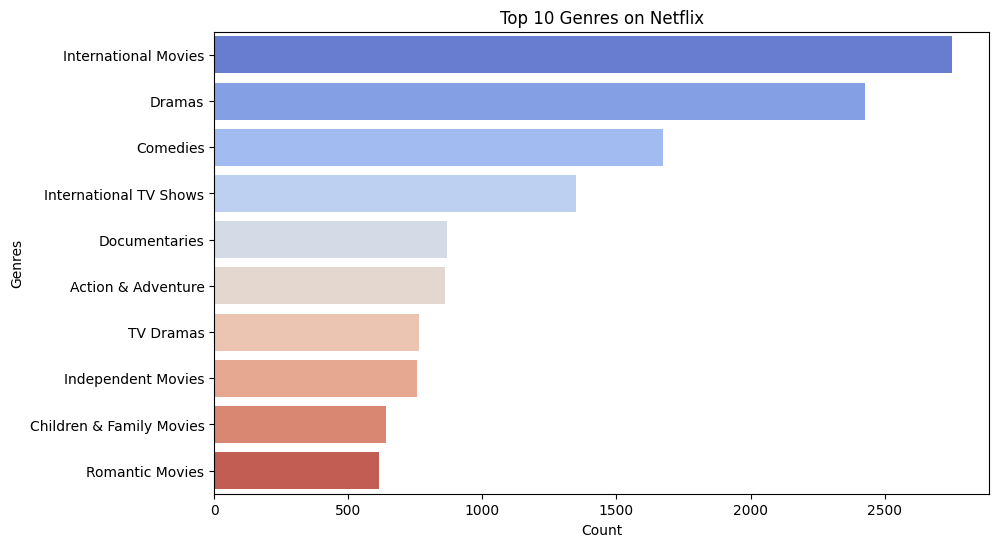

In [13]:
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

Content Added Over time

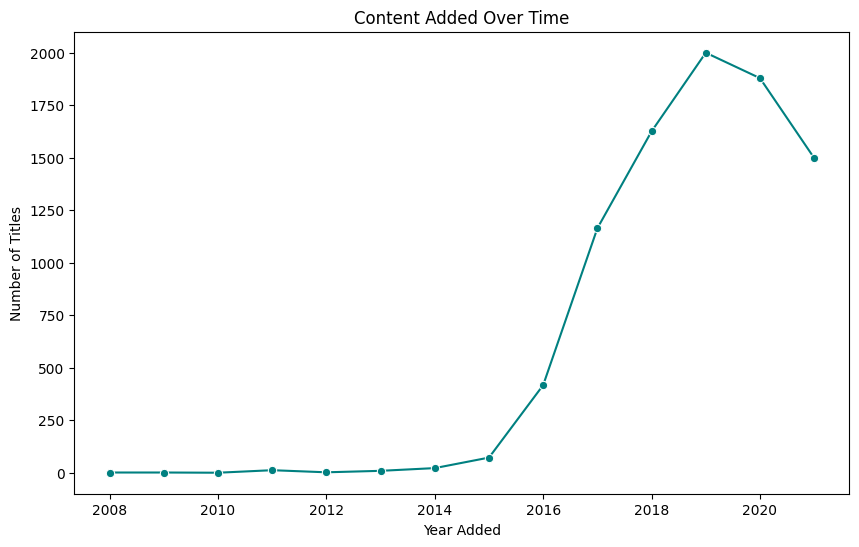

In [14]:
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o', color='teal')
plt.title('Content Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

Top Content Producing Countries

<ipython-input-15-28aa9f3ea787>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='flare')


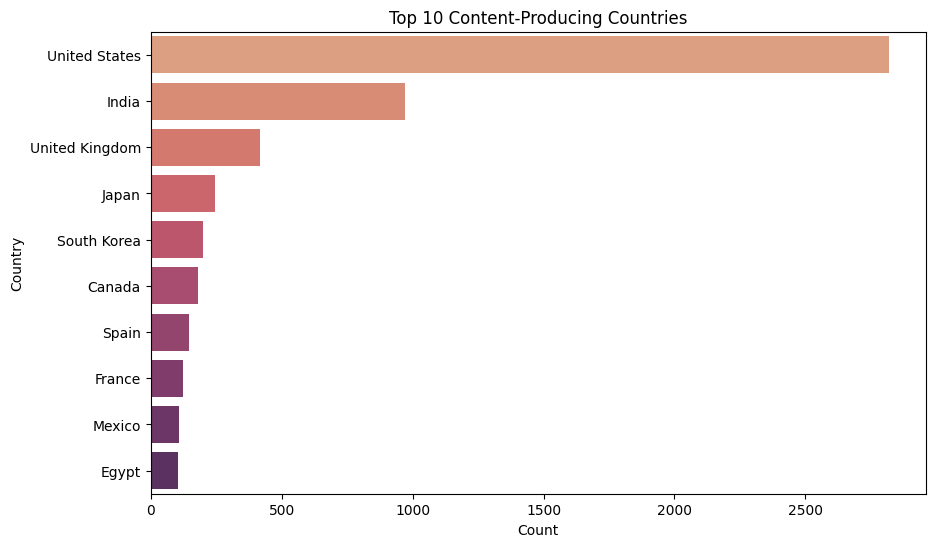

In [15]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='flare')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

Ratings Distribution

<ipython-input-16-a8bba4e93a48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings.index, y=ratings.values, palette='rocket')


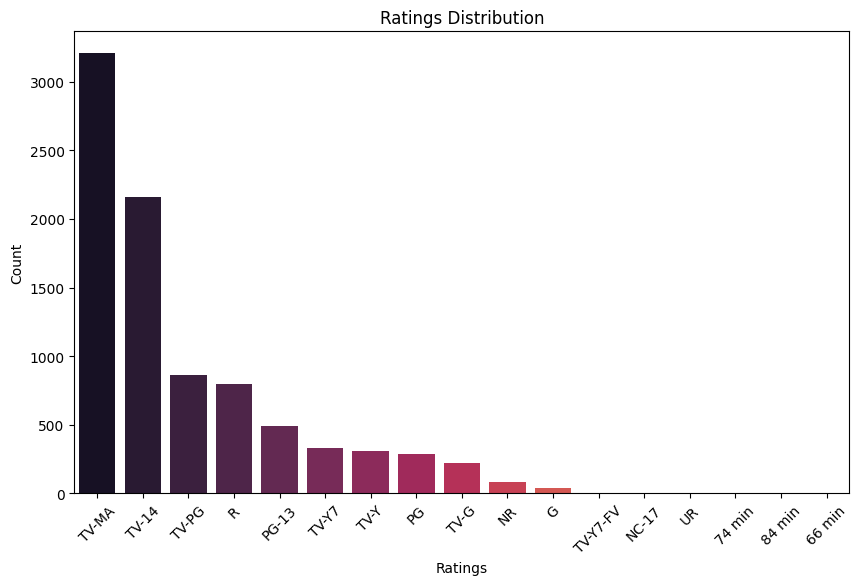

In [16]:
ratings = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings.index, y=ratings.values, palette='rocket')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()